#### Goals 
- Understand Hierarchical clustering
- Analyze competitors cars before market launch
- Learn cleaning, visualization, other library use along the way

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# First, I will try with random inbuilt values 
# Then with actual dataset
from sklearn.datasets._samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=[[5, 5], [-2, -3], [1, 1], [10, 5]], cluster_std=0.9)
print(x[0:5])
# print(x[:,1])
print(x[0:5,:1])
x.dtype

[[-1.90116125 -3.00117702]
 [ 5.56527622  4.65176631]
 [-1.52956823 -2.60944292]
 [-1.13109916 -2.54907362]
 [ 1.55214142  2.07347213]]
[[-1.90116125]
 [ 5.56527622]
 [-1.52956823]
 [-1.13109916]
 [ 1.55214142]]


dtype('float64')

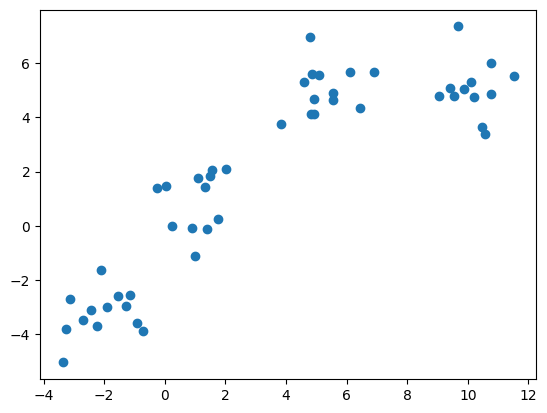

In [26]:
# Scatter plot of the data
plt.scatter(x[:, 0], x[:, 1], marker='o')

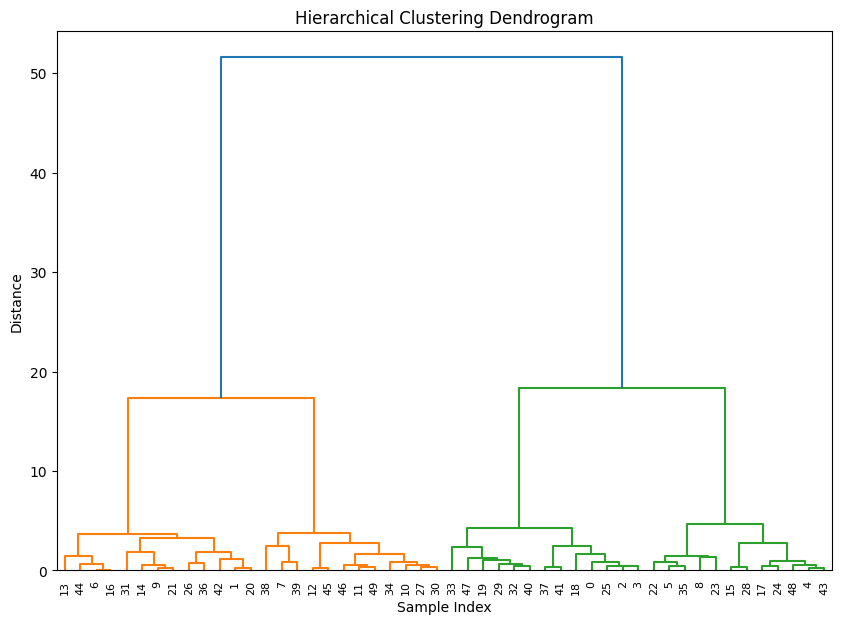

In [37]:
# Dendogram plot
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(x, method="ward")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [27]:
# Implementing agglomerative algorithm
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=4, linkage="average")

In [34]:
labels = aggl.fit_predict(x)

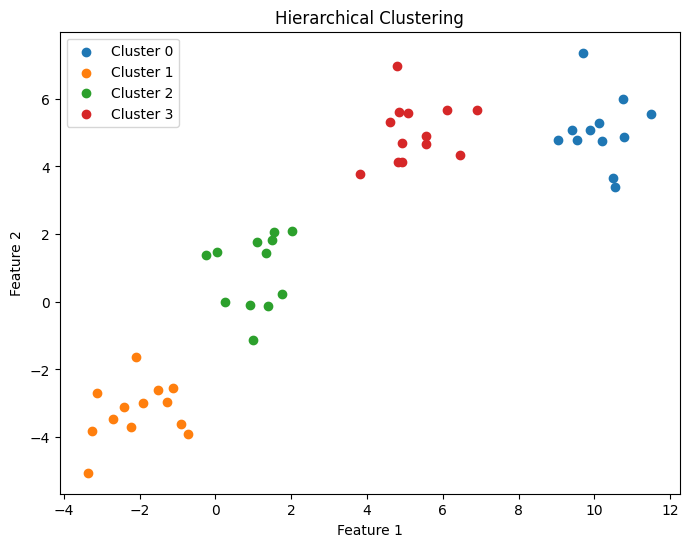

In [36]:
# Plotting the predicted graph for the data

# Figure size 8 inches by 6 inches
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(x[labels == label, 0], x[labels == label, 1], label=f"Cluster {label}")
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [41]:
# Loading the datasets
car_df = pd.read_csv("./datasets/cars_clus.csv")
car_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [58]:
# print(car_df.describe())
# print(car_df.shape)
# print(car_df.dtypes)
print(car_df.info())
print(car_df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB
None
2544


In [59]:
# Brainstorming over data
# All columns looks important
# Label encoding is needed
# Cleaning of the data is needed
# Normalization is needed
# then fit and predict
print(car_df.head())
print(car_df["manufact"].unique())
print(len(car_df["model"].unique()))

  manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0  
['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar'

In [ ]:
# Data cleaning
# converting to number since everything is object
# removing NaN and resetting indexes 
car_df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']] = car_df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']].apply(pd.to_numeric, errors="coerce")
car_df = car_df.dropna()
car_df = car_df.reset_index(drop=True)
print(car_df.size)

1872


In [66]:
# Feature to select
feature_set = car_df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg']]

In [68]:
# Normalizing the data
# min max scaler = x_scaled = (x - x_min) / (x_max - x_min)
from sklearn.preprocessing import MinMaxScaler 
x = feature_set.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

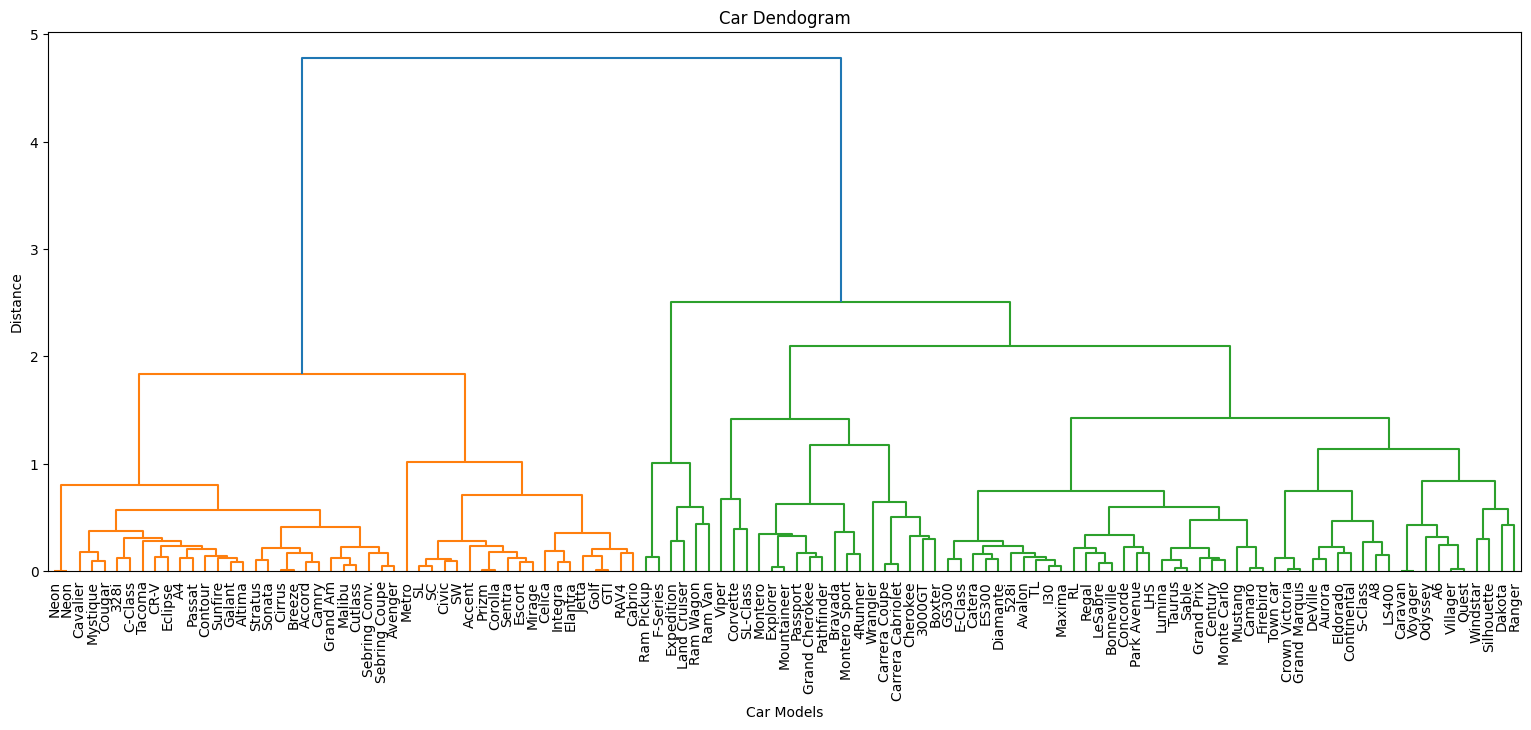

In [97]:
# Clustering using scipy library
linkage_matrix = linkage(feature_mtx, method="ward")
plt.figure(figsize=(19, 7))
plt.title("Car Dendogram")
plt.xlabel("Car Models")
plt.ylabel("Distance")
dendrogram(linkage_matrix,labels=car_df['model'].values, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [80]:
# Model using sklear
from scipy.cluster.hierarchy import fcluster
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
car_df['cluster'] = cluster_labels
car_df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,3
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,3
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0,1
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0,1
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0,1
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0,1


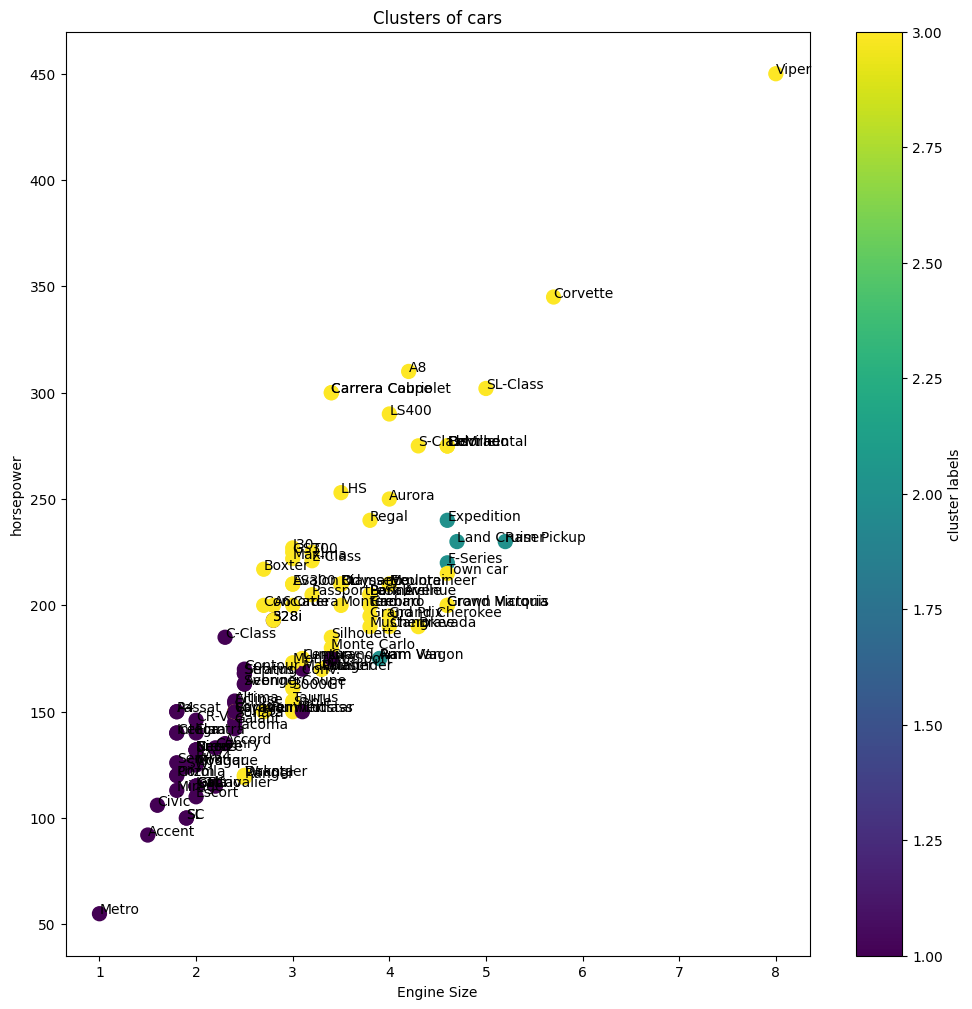

In [85]:
plt.figure(figsize=(12, 12))
plt.scatter(x[:,0], x[:, 1], c=cluster_labels, cmap="viridis", s=100)
plt.title("Clusters of cars")
plt.xlabel("Engine Size")
plt.ylabel("horsepower")
for i, model in enumerate(car_df["model"]):
    plt.annotate(model, (x[i, 0], x[i, 1]))
plt.colorbar(label="cluster labels")
plt.show()

In [87]:
car_df.groupby(["cluster", "type"])["cluster"].count()

cluster  type
1        0.0     44
         1.0      3
2        1.0      6
3        0.0     44
         1.0     20
Name: cluster, dtype: int64

In [90]:
agg_cars = car_df.groupby(["cluster", "type"])[["horsepow", "engine_s", "mpg", "price"]].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster type                                            
1       0.0   135.545455  2.138636  27.909091  17.062568
        1.0   138.333333  2.133333  24.666667  16.322000
2       1.0   211.666667  4.483333  16.166667  29.024667
3       0.0   230.090909  3.738636  23.040909  36.110682
        1.0   171.850000  3.240000  20.450000  23.784650

/tmp/ipykernel_13360/524150906.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
/tmp/ipykernel_13360/524150906.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

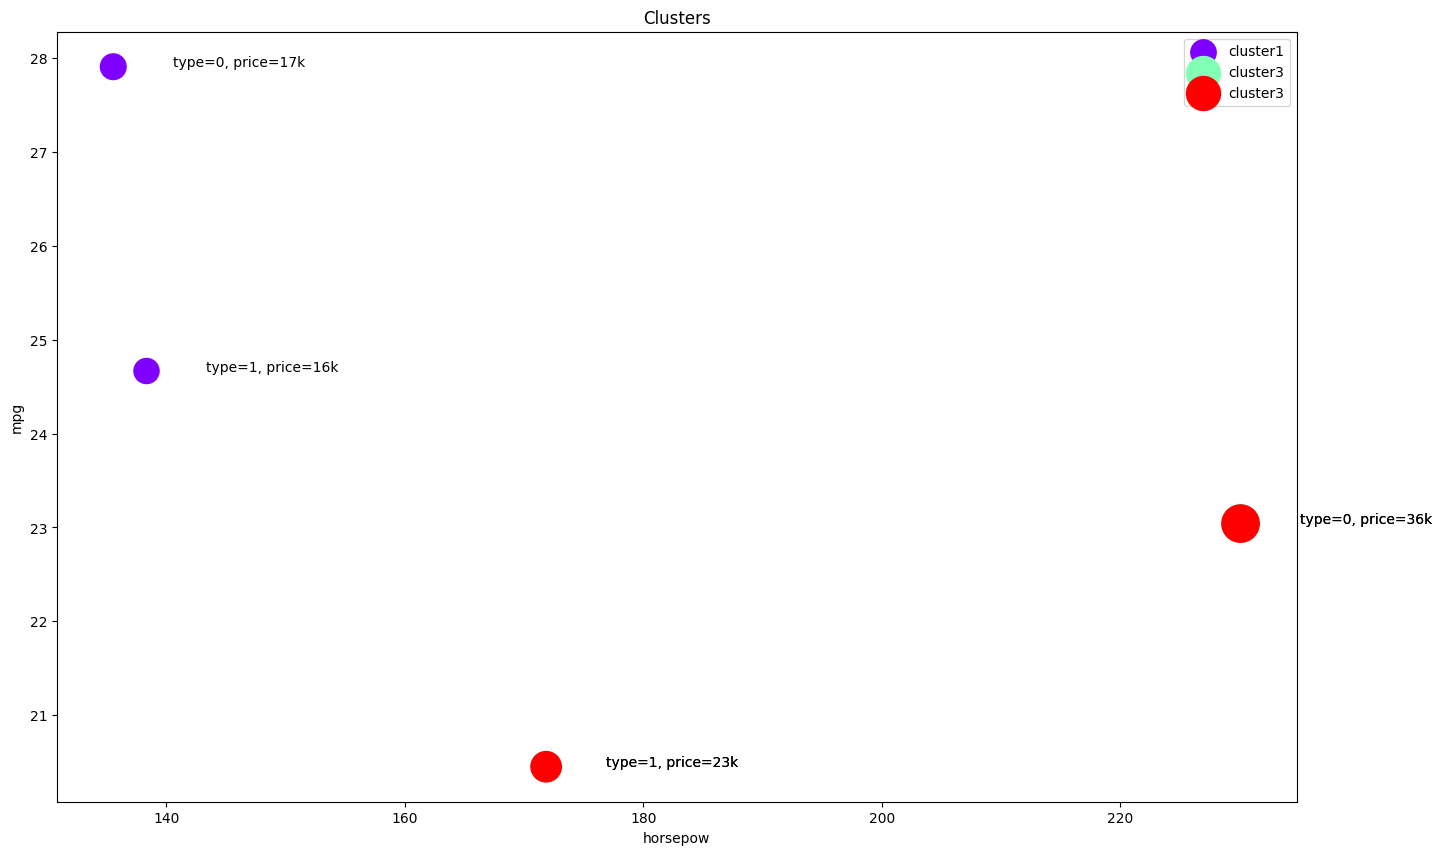

In [94]:
import matplotlib.cm as cm
n_clusters = 3
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


### Summary
Analyzed the competitor car data using Hierarchical clustering
learned
- Unsupervised learning basics
- Data cleaning and visualization
- Dendoram plotting

pic here

Notebook implementation below

In [98]:
print("The End!")

The End!
